In [407]:
!pip install spacy

In [408]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------- ----------------- 7.3/12.8 MB 41.2 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 40.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [409]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

In [410]:
#read the data 
reviews_nodevtype=pd.read_csv("steam_reviews.csv")

In [411]:
reviews_nodevtype

,game_title,appid,recommendationid,review,cleaned_reviews,sentiment
0,Rust,252490,177409644,Rust is a great game. It is like real life if there where no rules. Everyone is very toxic if they have power but when they are starting they are crybabies. I think that its a pretty hard game to master and needs a lot of hours which most people dont have. Before playing you need to know that everything is temporary so you wont be frustrated with the game. This game is not for everyone. The game is great in its own unique way and also is perfect if you are trying to become an electrician.,rust is a great game it is like real life if there where no rules everyone is very toxic if they have power but when they are starting they are crybabies i think that its a pretty hard game to master and needs a lot of hours which most people dont have before playing you need to know that everything is temporary so you wont be frustrated with the game this game is not for everyone the game is great in its own unique way and also is perfect if you are trying to become an electrician,NEU
1,Rust,252490,177619447,"This game makes me want to kill myself. It's so addicting I low key cant hop off the game even when I try. I can literally play for 10+ hours at a time if I felt like it easily. Please do NOT get this fucking game. It is full of Nazis, Russians, racism and loud little kids screaming at you for your 14 wood you just farmed. You can't get a fucking base down because of full ak kits roaming for no fucking reason. If you ever think of getting this game, I ADVISE YOU TO NOT GET IT, I REPEAT, DO NOT GET THIS GAME.",this game makes me want to kill myself its so addicting i low key cant hop off the game even when i try i can literally play for hours at a time if i felt like it easily please do not get this fucking game it is full of nazis russians racism and loud little kids screaming at you for your wood you just farmed you cant get a fucking base down because of full ak kits roaming for no fucking reason if you ever think of getting this game i advise you to not get it i repeat do not get this game,NEG
2,Rust,252490,178793028,"Great game very unique and grindy, which I personally enjoy. It's always been my #1 game, and I've been playing since the Legacy days. It's come a long way, i definitely recommend it, but just keep in mind that there's a lot to learn and figure out, so it can be frustrating for new players at first.",great game very unique and grindy which i personally enjoy its always been my game and ive been playing since the legacy days its come a long way i definitely recommend it but just keep in mind that theres a lot to learn and figure out so it can be frustrating for new players at first,POS
3,Rust,252490,177844978,"[h1]My [i]Rust[/i] Review - 223 Hours In[/h1]\n\n[b]Rating:[/b] ⭐⭐⭐⭐☆ (4/5)\n\n223 hours in Rust has taught me one thing: you either survive and thrive, or you get ambushed naked and lose everything. This game is ruthless, and honestly, that’s half the fun. Here’s my take from a player who’s crafted, built, fought, and gotten betrayed way too many times.\n\n[hr][/hr]\n\n[h2]Gameplay - Brutal, Unpredictable, and Completely Addictive[/h2]\nIn Rust, you’re constantly on your toes. You start with nothing but a rock and a torch, scavenging for resources, crafting, and upgrading your base… all while everyone else is trying to take you out. The satisfaction of going from a naked survivor to a geared warrior with a fully fortified base is a journey that’s tough but incredibly rewarding.\n\nSome classic Rust experiences:\n\nSneaking into someone’s base and “borrowing” supplies.\nLogging off after a good session… only to come back and find you’ve been raided.\nMaking allies with strangers, who may turn on you at any moment!\n[hr][/hr]\n\n[h2]Graphics & Environment - Gritty and Real[/h2]\nThe environment is unforgiving but beautifully rendered. From dense forests to wide-open plains, the scenery is as stunning as it is hostile. Watchin

the following code was written with the help of ChatGPT

In [412]:
#add type of developer to dataframe 
developers = pd.read_csv("is310-final-project-data-2.csv")

# Merge the DataFrames on 'game_title' (df2) and 'name' (df1)
merged_df = reviews_nodevtype.merge(developers[['name', 'type_of_developer', 'simplified_category']], 
                      left_on='game_title', 
                      right_on='name', 
                      how='left')

# Drop the 'name' column if not needed after the merge
merged_df = merged_df.drop(columns=['name'])

merged_df

,game_title,appid,recommendationid,review,cleaned_reviews,sentiment,type_of_developer,simplified_category
0,Rust,252490,177409644,Rust is a great game. It is like real life if there where no rules. Everyone is very toxic if they have power but when they are starting they are crybabies. I think that its a pretty hard game to master and needs a lot of hours which most people dont have. Before playing you need to know that everything is temporary so you wont be frustrated with the game. This game is not for everyone. The game is great in its own unique way and also is perfect if you are trying to become an electrician.,rust is a great game it is like real life if there where no rules everyone is very toxic if they have power but when they are starting they are crybabies i think that its a pretty hard game to master and needs a lot of hours which most people dont have before playing you need to know that everything is temporary so you wont be frustrated with the game this game is not for everyone the game is great in its own unique way and also is perfect if you are trying to become an electrician,NEU,"['Indie', 'AA']",Multiple
1,Rust,252490,177619447,"This game makes me want to kill myself. It's so addicting I low key cant hop off the game even when I try. I can literally play for 10+ hours at a time if I felt like it easily. Please do NOT get this fucking game. It is full of Nazis, Russians, racism and loud little kids screaming at you for your 14 wood you just farmed. You can't get a fucking base down because of full ak kits roaming for no fucking reason. If you ever think of getting this game, I ADVISE YOU TO NOT GET IT, I REPEAT, DO NOT GET THIS GAME.",this game makes me want to kill myself its so addicting i low key cant hop off the game even when i try i can literally play for hours at a time if i felt like it easily please do not get this fucking game it is full of nazis russians racism and loud little kids screaming at you for your wood you just farmed you cant get a fucking base down because of full ak kits roaming for no fucking reason if you ever think of getting this game i advise you to not get it i repeat do not get this game,NEG,"['Indie', 'AA']",Multiple
2,Rust,252490,178793028,"Great game very unique and grindy, which I personally enjoy. It's always been my #1 game, and I've been playing since the Legacy days. It's come a long way, i definitely recommend it, but just keep in mind that there's a lot to learn and figure out, so it can be frustrating for new players at first.",great game very unique and grindy which i personally enjoy its always been my game and ive been playing since the legacy days its come a long way i definitely recommend it but just keep in mind that theres a lot to learn and figure out so it can be frustrating for new players at first,POS,"['Indie', 'AA']",Multiple
3,Rust,252490,177844978,"[h1]My [i]Rust[/i] Review - 223 Hours In[/h1]\n\n[b]Rating:[/b] ⭐⭐⭐⭐☆ (4/5)\n\n223 hours in Rust has taught me one thing: you either survive and thrive, or you get ambushed naked and lose everything. This game is ruthless, and honestly, that’s half the fun. Here’s my take from a player who’s crafted, built, fought, and gotten betrayed way too many times.\n\n[hr][/hr]\n\n[h2]Gameplay - Brutal, Unpredictable, and Completely Addictive[/h2]\nIn Rust, you’re constantly on your toes. You start with nothing but a rock and a torch, scavenging for resources, crafting, and upgrading your base… all while everyone else is trying to take you out. The satisfaction of going from a naked survivor to a geared warrior with a fully fortified base is a journey that’s tough but incredibly rewarding.\n\nSome classic Rust experiences:\n\nSneaking into someone’s base and “borrowing” supplies.\nLogging off after a good session… only to come back and find you’ve been raided.\nMaking allies with strangers, who may turn on you at any moment!\n[hr][/hr]\n\n[h2]Graphics & Environment - Gritty and Real[/h2]\nThe environment is unforgiving

In [413]:
#create csv
merged_df.to_csv("steam_reviews_2.csv", index=False)

In [414]:
#create new df with type of developer included
reviews=pd.read_csv("steam_reviews_2.csv")

In [415]:
reviews_mult=reviews[reviews['simplified_category']=='Multiple']

In [416]:
reviews_indie=reviews[reviews['simplified_category']=='Indie']

In [417]:
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(reviews['cleaned_reviews'])

In [418]:
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aaa,aart,abandon,abandoned,abhor,abhorrent,abilities,ability,ablaze,able,...,可以說是這麼多代fc來說,多不勝數,最大問題是ea,最差的一代,最适合玩csgo的宝宝们练枪的游戏可以和人质sama玩捆绑play后入狗爬式跟随精神控制注意,會給好評的人究竟ea,糞作,給了你多少迷湯,這麼多年仍然是用薯仔來做server,還是一生從沒打過機
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [419]:
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [420]:
reviews['lemmatized_reviews'] = reviews['cleaned_reviews'].apply(lemmatize)

In [421]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(reviews['lemmatized_reviews'])

In [422]:
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

time                  401
feel                  352
player                352
new                   301
fun                   291
                     ... 
express                 3
protagonist             3
prone                   3
extraction shooter      3
rd                      3
Length: 3849, dtype: int64

In [423]:
print(word_counts.head(10))

time         401
feel         352
player       352
new          301
fun          291
ve           264
get          240
want         240
hour         235
character    230
dtype: int64


In [424]:
#convert word counts to a percentage
word_counts = word_counts / word_counts.sum()

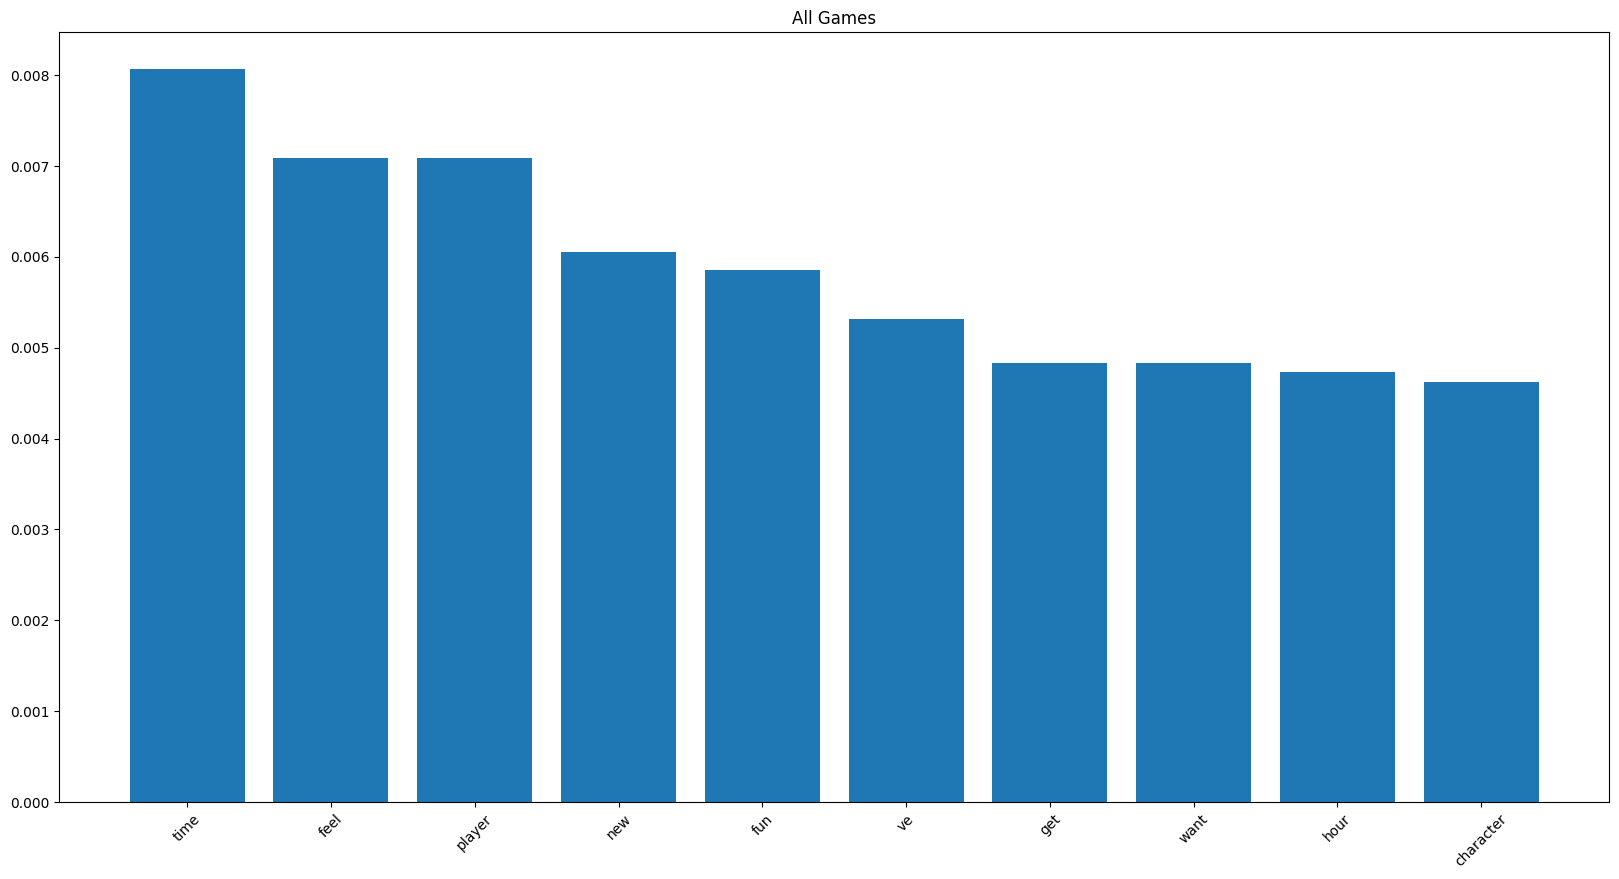

In [425]:
#plot the 10 most common words
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.title("All Games")
plt.show()

In [426]:
reviews_aaa=reviews[reviews['simplified_category']=='AAA']

In [427]:
reviews_aaa.loc[:, 'lemmatized_reviews'] = reviews_aaa['cleaned_reviews'].apply(lemmatize)

In [428]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
aaa_bag_of_words = vectorizer.fit_transform(reviews_aaa['lemmatized_reviews'])
aaa_bow_df = pd.DataFrame(aaa_bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
aaa_word_counts = aaa_bow_df.sum()
aaa_word_counts = aaa_word_counts.sort_values(ascending=False)
print(aaa_word_counts.head(10))


story     79
new       59
time      57
feel      53
fun       44
get       42
ve        41
want      41
player    34
great     34
dtype: int64


In [429]:
aaa_word_counts = aaa_word_counts / aaa_word_counts.sum()

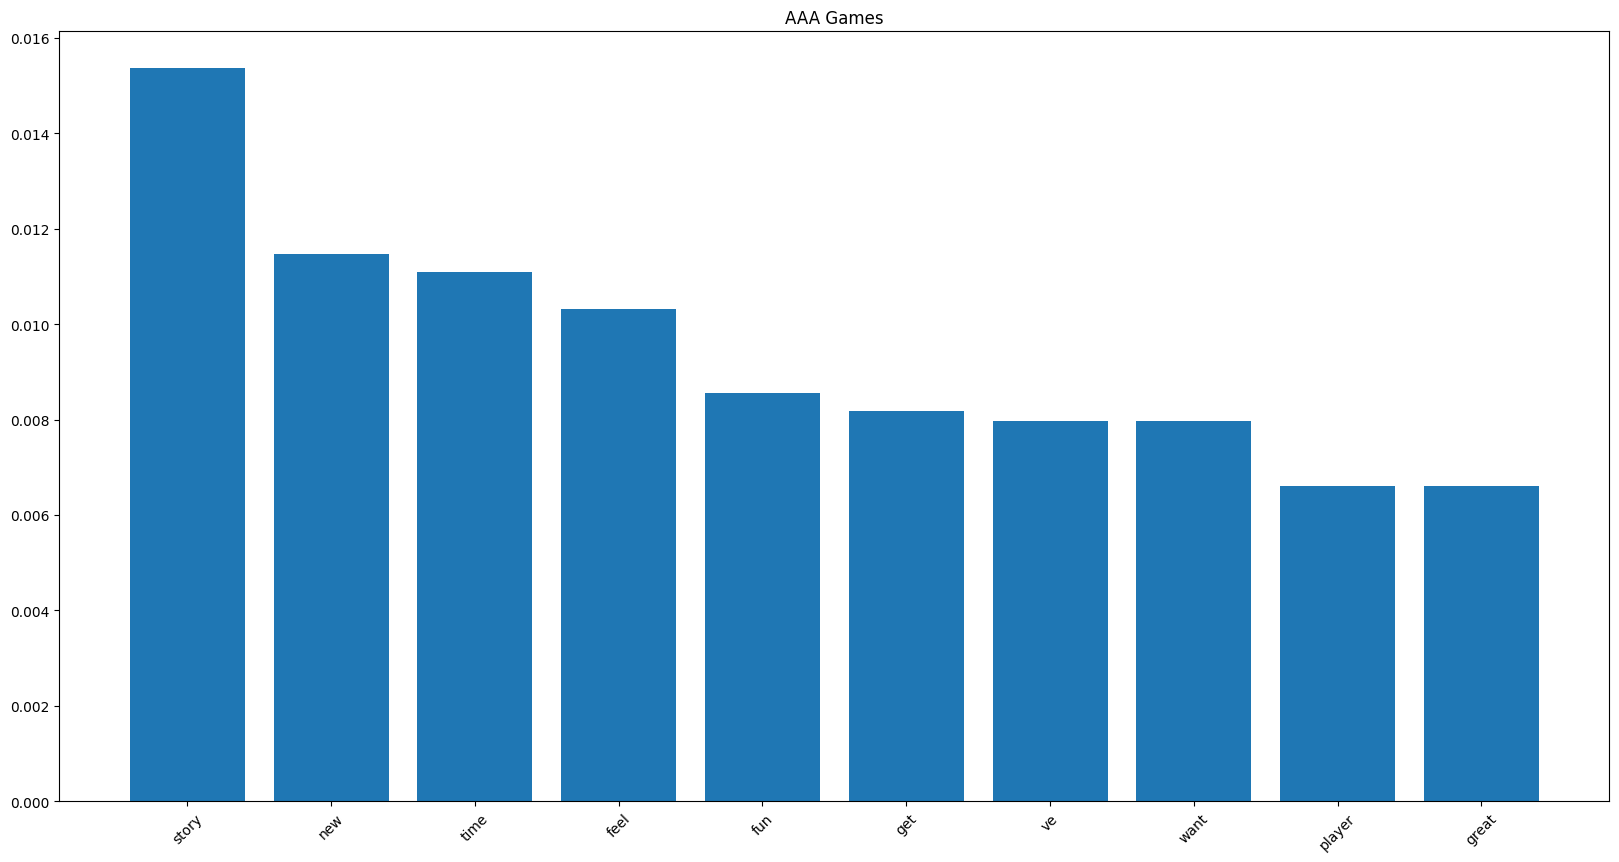

In [430]:
#plot the 10 most common words
aaa_plot_list = aaa_word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(aaa_plot_list.index, aaa_plot_list.values)
plt.xticks(rotation=45)
plt.title("AAA Games")
plt.show()

In [431]:
reviews_mult=reviews[reviews['simplified_category']=='Multiple']
reviews_mult.loc[:, 'lemmatized_reviews'] = reviews_mult['cleaned_reviews'].apply(lemmatize)

In [432]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
mult_bag_of_words = vectorizer.fit_transform(reviews_mult['lemmatized_reviews'])
mult_bow_df = pd.DataFrame(mult_bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
mult_word_counts = mult_bow_df.sum()
mult_word_counts = mult_word_counts.sort_values(ascending=False)
print(mult_word_counts.head(10))

like      122
good      117
time      116
player    115
fun        80
new        71
feel       65
hour       63
bad        59
ve         58
dtype: int64


In [433]:
mult_word_counts = mult_word_counts / mult_word_counts.sum()

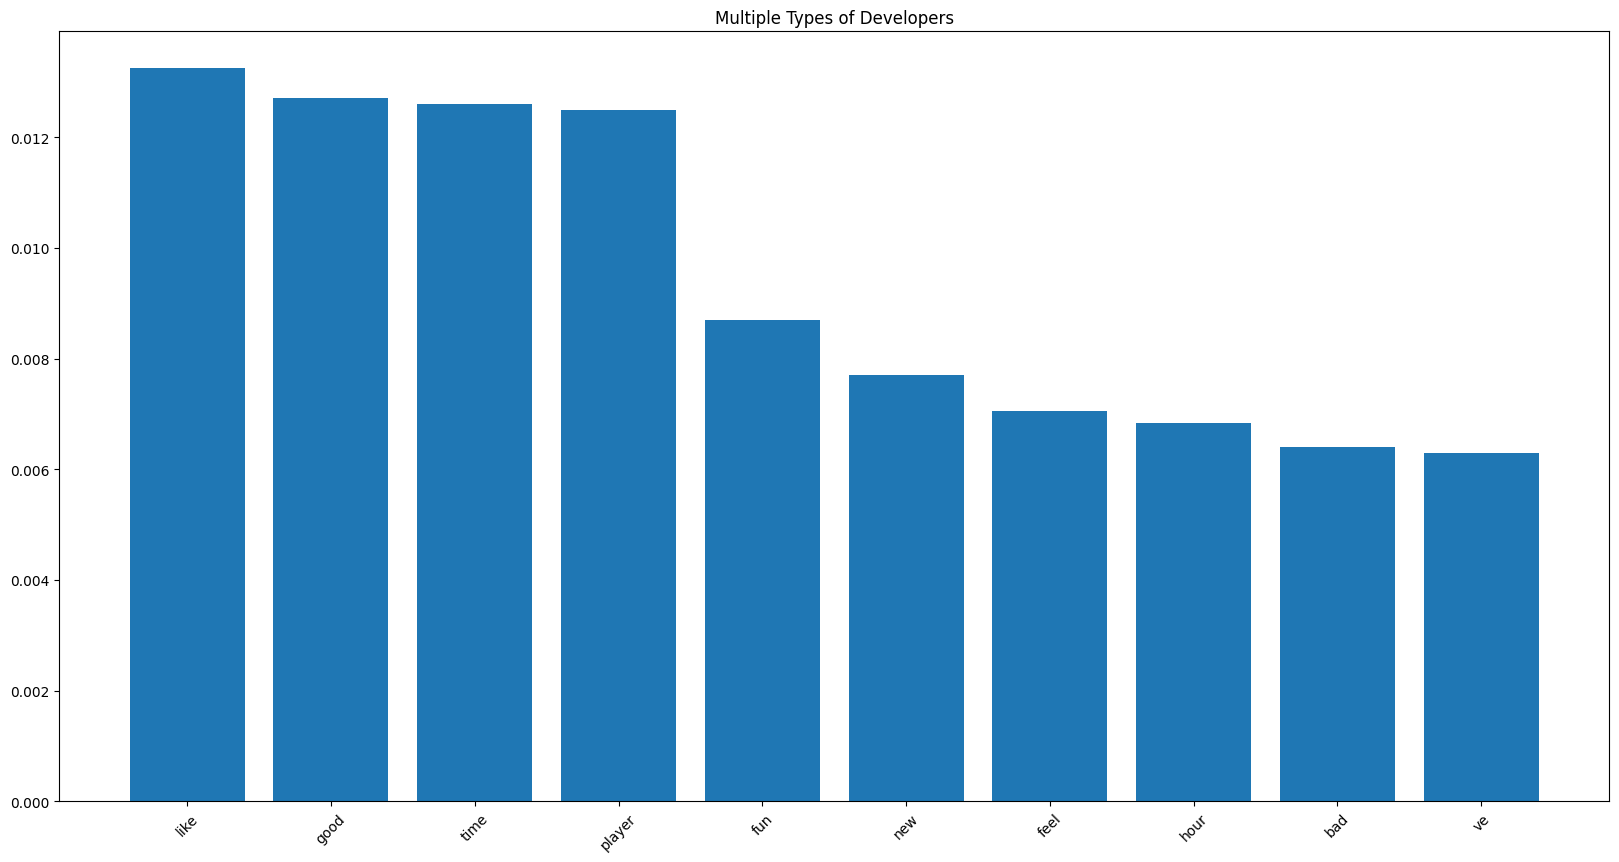

In [434]:
plot_list = mult_word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.title("Multiple Types of Developers")
plt.show()

In [435]:
reviews_indie=reviews[reviews['simplified_category']=='Indie']
reviews_indie.loc[:, 'lemmatized_reviews'] = reviews_indie['cleaned_reviews'].apply(lemmatize)

In [436]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
indie_bag_of_words = vectorizer.fit_transform(reviews_indie['lemmatized_reviews'])
indie_bow_df = pd.DataFrame(indie_bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
indie_word_counts = indie_bow_df.sum()
indie_word_counts = indie_word_counts.sort_values(ascending=False)
print(indie_word_counts.head(10))

time      115
fun        94
feel       90
get        77
player     75
new        72
ve         69
make       68
hour       66
thing      63
dtype: int64


In [437]:
indie_word_counts = indie_word_counts / indie_word_counts.sum()

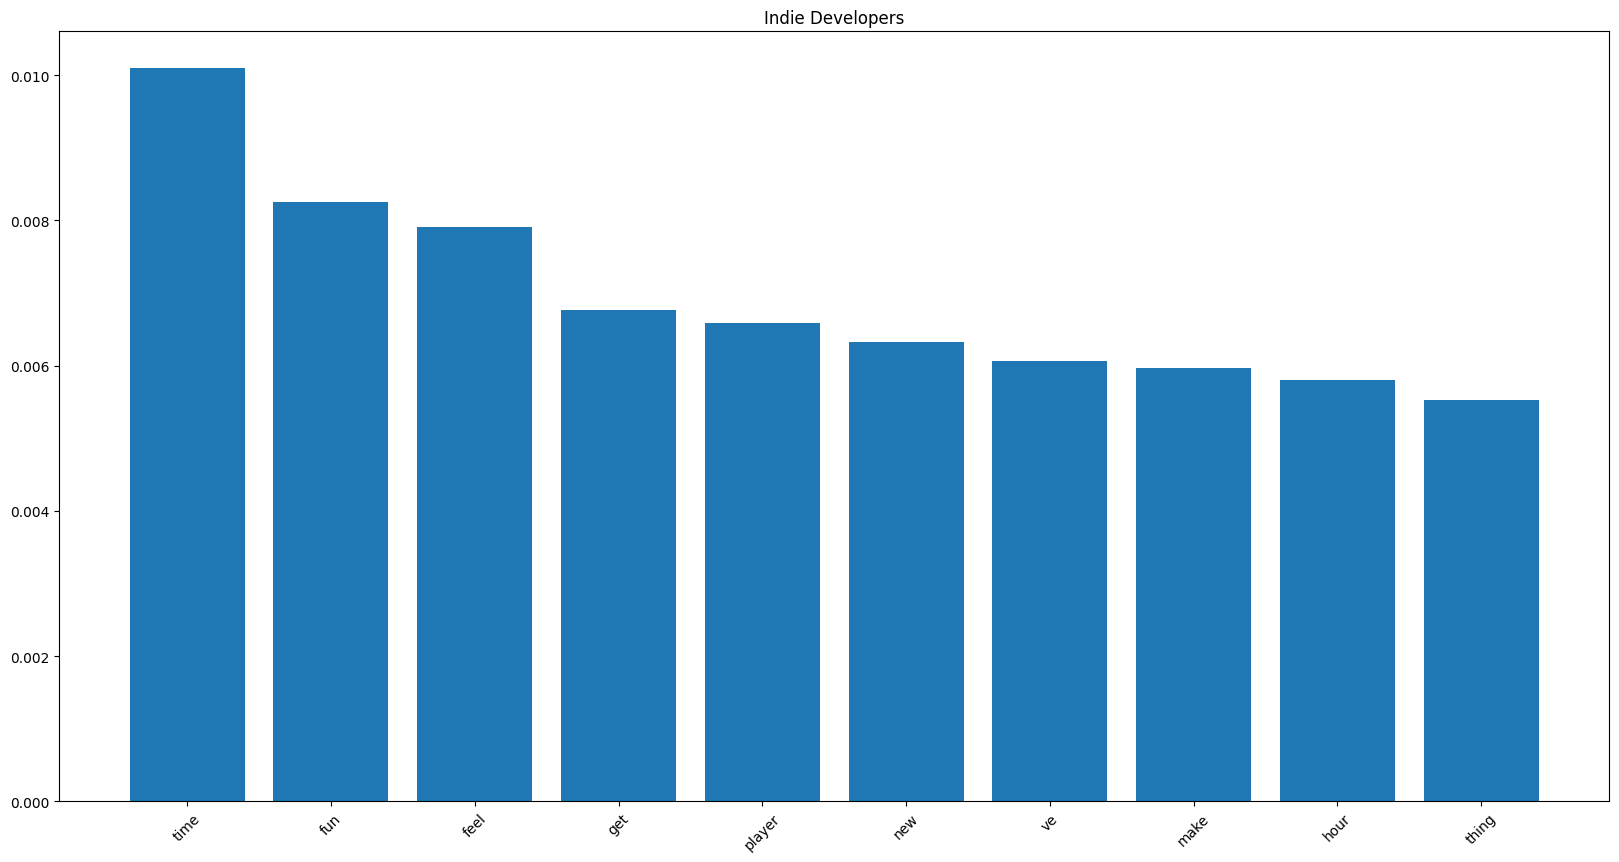

In [438]:
plot_list = indie_word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.title("Indie Developers")
plt.show()

In [439]:
#train a logistic regression model using the bag of words features as X and the sentiment column as y
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = bag_of_words
y = reviews['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.6458333333333334

In [441]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
coefficients = pd.DataFrame({'feature': bow_df.columns, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

In [442]:
top_10_negative

,feature,coefficient
3255,standard,-0.412824
2025,look,-0.431141
1335,game like,-0.443985
3108,shop,-0.493246
2014,lol,-0.502509
1177,free,-0.512658
2289,nice,-0.526055
96,amazing,-0.527906
2695,pretty,-0.577625
1520,good game,-0.688391


In [443]:
top_10_positive

,feature,coefficient
623,crash,0.776530
311,boring,0.771183
2654,poor,0.655286
2176,miss,0.647654
324,break,0.626118
314,bot,0.613272
457,cheater,0.610000
3612,unplayable,0.597822
3101,shit,0.596188
1126,fix,0.558625


In [444]:
from wordcloud import WordCloud

In [445]:
# this was generated with help from chatgpt
# Convert top 10 positive and negative features into dictionaries
top_positive = {row['feature']: row['coefficient'] for _, row in top_10_positive.iterrows()}
top_negative = {row['feature']: abs(row['coefficient']) for _, row in top_10_negative.iterrows()}


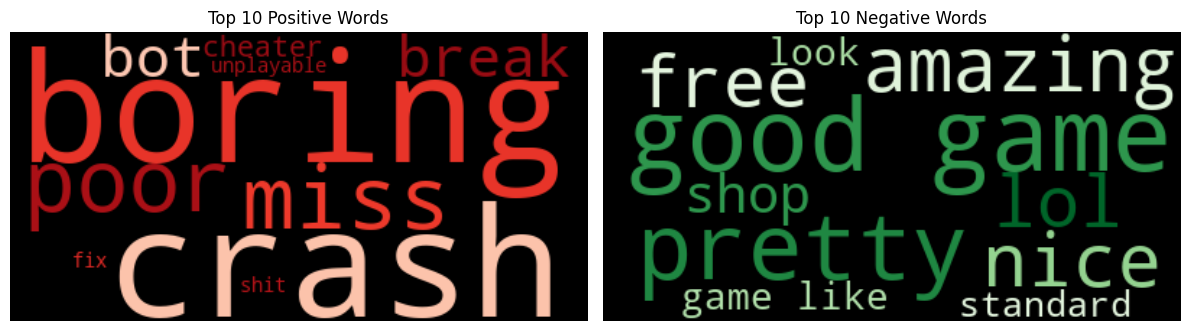

In [446]:

# Generate word clouds
wordcloud_pos = WordCloud(background_color='black', colormap='Reds').generate_from_frequencies(top_positive)
wordcloud_neg = WordCloud(background_color='black', colormap='Greens').generate_from_frequencies(top_negative)

# Plot the word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Top 10 Positive Words')

axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Top 10 Negative Words')

plt.tight_layout()
plt.show()


In [447]:
#train a logistic regression model using the bag of words features as X and the simplified_category column as y
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = bag_of_words
y = reviews['simplified_category']
y = y.fillna('Unknown')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [448]:
accuracy_score(y_test, y_pred)

1.0

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.515625

In [450]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
coefficients = pd.DataFrame({'feature': bow_df.columns, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

In [451]:
top_10_positive

,feature,coefficient
2748,pubg,0.678724
348,bug,0.672850
2223,ms,0.641879
751,destiny,0.640276
363,bungie,0.627728
190,away,0.620936
1850,join,0.617525
119,anymore,0.610847
2228,multiplayer,0.580856
3334,stuff,0.574438


In [452]:
top_10_negative

,feature,coefficient
277,bit,-0.273650
2522,people,-0.280903
3805,worth,-0.295628
3628,use,-0.296876
2015,long,-0.304444
3040,screen,-0.314197
18,account,-0.334330
2695,pretty,-0.339360
3,able,-0.367894
2704,price,-0.418708


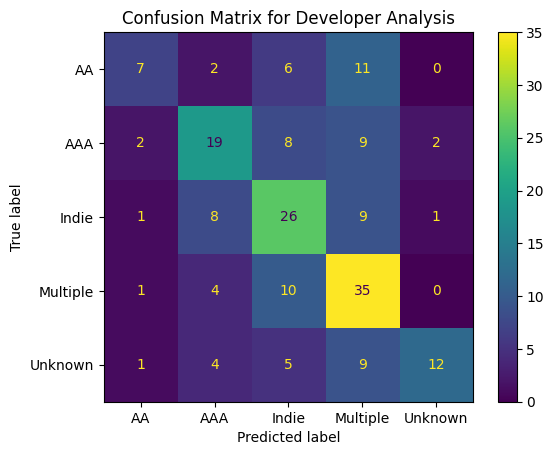

In [453]:
#chatgpt was used in writing this code 
from sklearn.metrics import ConfusionMatrixDisplay

# Dynamically infer labels from y_test
unique_classes = sorted(set(y_test))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    display_labels=unique_classes,  # Automatically set labels
)
plt.title("Confusion Matrix for Developer Analysis")
plt.show()


In [454]:
!pip install gensim

In [462]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

corpus = Sparse2Corpus(indie_bag_of_words, documents_columns=False)
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [464]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=5)
lda_model.print_topics()

[(0,
  '0.012*"get" + 0.011*"fun" + 0.010*"way" + 0.009*"time" + 0.009*"killer" + 0.008*"feel" + 0.008*"go" + 0.008*"player" + 0.006*"well" + 0.006*"perk"'),
 (1,
  '0.010*"time" + 0.007*"make" + 0.006*"want" + 0.006*"vr" + 0.006*"get" + 0.005*"bad" + 0.005*"gameplay" + 0.005*"point" + 0.005*"go" + 0.005*"ve"'),
 (2,
  '0.008*"fun" + 0.008*"feel" + 0.007*"community" + 0.007*"killer" + 0.007*"make" + 0.006*"card" + 0.006*"year" + 0.006*"great" + 0.006*"experience" + 0.005*"grind"'),
 (3,
  '0.010*"time" + 0.008*"recommend" + 0.008*"player" + 0.007*"experience" + 0.007*"love" + 0.007*"thing" + 0.007*"new" + 0.007*"great" + 0.006*"ve" + 0.006*"people"'),
 (4,
  '0.010*"feel" + 0.010*"time" + 0.009*"fun" + 0.009*"new" + 0.008*"hour" + 0.007*"year" + 0.007*"ve" + 0.007*"get" + 0.006*"update" + 0.006*"player"')]

In [470]:
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=reviews["cleaned_reviews"][158]
wrapped_string = textwrap.fill(toprint, width=120)
pd.set_option('display.max_colwidth', None)
toprint2=reviews["cleaned_reviews"][863]
wrapped_string2 = textwrap.fill(toprint2, width=120)
print(wrapped_string)
print(wrapped_string2)

dead by daylight will keep you coming back because its an inherently fun concept and particularly fun with kill your
friends custom matches however it feels like its managed by a developer thats shockingly ignorant about the state of
their game and will try to squeeze every cent out of you lets talk about  maps the disparity in maps is absolutely
insane and the community has been begging bhvr to fix them for almost a decade some maps are massive and incredibly
survivorsided other maps are incredibly small and make the killer extremely oppressive some maps have a ton of
verticality which makes some perks and killers incredibly strong other maps have almost none which renders some perks
useless some maps have the most useless pallets that give the survivors a huge advantage other maps have incredibly
strong pallets in such large quantities that the killer struggles to get anything done to exacerbate this map offerings
exist where a killer or a survivor can make it overwhelmingly likely t

In [481]:
rows=[]
for i in range(len(models)):
    row=[]
    for m in models[i]:
        row.append(m[1])
    rows.append(row)

topic_df=pd.DataFrame(rows)
topic_df.sort_values(2, ascending=False)

,0,1,2,3,4,5,6,7,8,9
524,0.000690,0.000690,0.993789,0.000690,0.000690,0.000690,0.000690,0.000690,0.000690,0.000690
451,0.000935,0.000935,0.991583,0.000935,0.000935,0.000935,0.000935,0.000935,0.000935,0.000935
797,0.001042,0.001042,0.990619,0.001042,0.001042,0.001042,0.001042,0.001042,0.001042,0.001042
795,0.001076,0.001076,0.990315,0.001076,0.001076,0.001076,0.001076,0.001076,0.001076,0.001076
852,0.001137,0.001137,0.989768,0.001137,0.001137,0.001137,0.001137,0.001137,0.001137,0.001137
...,...,...,...,...,...,...,...,...,...,...
158,0.997819,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242
214,0.008116,0.486629,0.000234,0.000234,0.000234,0.000234,0.000234,0.018732,0.197318,0.288032
836,0.682694,0.054682,0.000204,0.000204,0.001259,0.000204,0.148081,0.063377,0.049092,0.000204
202,0.051911,0.864417,0.000204,0.000204,0.000204,0.000204,0.000204,0.055908,0.026541,0.000204


In [483]:
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=reviews["cleaned_reviews"][524]
wrapped_string = textwrap.fill(toprint, width=120)
pd.set_option('display.max_colwidth', None)
toprint2=reviews["cleaned_reviews"][797]
wrapped_string2 = textwrap.fill(toprint2, width=120)
print(wrapped_string)
print(wrapped_string2)

an interesting if quickly repetitive cannedanimationcombat system build on the grindiest afktoprogress pseudommo around
it looks amazing with settings ramped up but optimisation has remained an issue since launch the world is huge and
believable but you only end up going to specific locations to farm and place alts on the various other locations of note
worldbossspawns key interactables seasonal event locations theres in theory forces pvp flagging after you hit midgame
you cant unlock your bonus weapon without allowingopting yourself to pvp flag in certain areasenvironments from that
point on with that character but the pvp is entirely about hardcounters level discrepancies and gearscore so if someone
decides to engage you to kick you off a farmspot you will simply die without presenting the merest hint of a challenge
core gameplay is grinding the  spots optimal for massed trashdrops vendored for money xp and certain
questartifactcraftingenhancement drops gear progression is  armourwea